In [1]:
f = open("C:/Users/1/Desktop/стоп слова.txt", "r", encoding="utf-8")
lines = f.readlines()

def stop_words(lines):
    stop_words = []
    for line in lines:
        line = line.strip("\n")
        line = line.replace("\ufeff", "")
        stop_words.append(line)
    return (stop_words)

def number(word):
    nums = "0123456789"
    for i in word:
        if i in nums:
            return True

In [2]:
print (stop_words(lines))

['а', 'бы', 'в', 'во', 'вот', 'для', 'до', 'если', 'же', 'за', 'и', 'из', 'или', 'к', 'ко', 'на', 'над', 'но', 'о', 'об', 'от', 'по', 'при', 'с', 'то', 'у', 'чтобы', 'да', 'нет', 'не', 'ни', '—', 'это', 'много', 'немного', 'мало', 'немало', 'больше', 'меньше', 'я', 'мы', 'ты', 'вы', 'он', 'она', 'оно', 'они', 'можно', 'мочь', 'нельзя', 'надо', 'нужно', 'иметь', 'быть', 'который', 'какой', 'как', 'что', 'где', 'когда', 'потому', 'только', 'также', 'тоже']


In [3]:
#новости с сайта ленты.ру, уже лемматизированные майстемом
s = open("C:/Users/1/Desktop/лента.txt", "r", encoding="utf-8")
s = s.read()
words = s.split()

def all_words(words):
    punct = ".,:;?!()«»"
    all_words = []
    for word in words:
        word = word.strip("\ufeff")
        for letter in word:
            if letter in punct:
                word = word.replace(letter, "")
        if word in stop_words(lines):
            word = word.replace(word, "stop-word")
        if number(word) == True:
            word = word.replace(word, "")
        if word != "":
            all_words.append(word)
    return (all_words)

In [4]:
def indices():
    words_all = all_words(words)
    dic = {}
    count = 0
    for i in range(len(words_all)):
        if words_all[i] not in dic:
            count += 1
            dic[words_all[i]] = count
    return (dic)

In [5]:
print (len(indices().keys()))

3129


In [6]:
edges = []
words_all = all_words(words)
dic_ind = indices()

In [7]:
for i in range(len(words_all)):
    for j in range(i+1, min(i+4, len(words_all))):
        if i == j:
            continue
        edge = tuple((int(dic_ind[words_all[i]]), int(dic_ind[words_all[j]])))
        edges.append(edge)

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

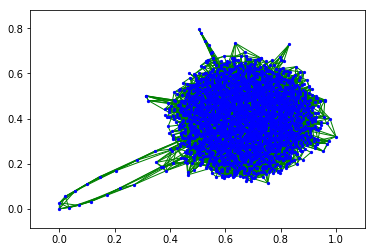

In [9]:
G = nx.Graph()
G.add_nodes_from(range(1, 2964))
G.add_edges_from(edges)
nx.write_gexf(G, "graph.gexf")
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color = "blue", node_size = 5)
nx.draw_networkx_edges(G, pos, edge_color = "green")
plt.show()

In [10]:
G.number_of_edges()

18703

In [11]:
nx.radius(G)

4

In [12]:
nx.diameter(G)

6

In [13]:
nx.density(G)

0.003821808851932953

In [14]:
nx.degree_pearson_correlation_coefficient(G)

-0.096578572557733278

In [15]:
nx.average_clustering(G)

0.5622523752297502

In [16]:
nx.transitivity(G)

0.019216705922263183

In [17]:
deg = nx.degree_centrality(G)
arr = []
for nodeid in sorted(deg, key=deg.get, reverse=True):
    arr.append(nodeid)

arr2 = []
for word in dic_ind.keys():
    arr2.append(word)

for num in arr[:7]:
    print (arr2[num])

внесение
вносить
сентябрь
выбирать
обвинение
отмечать
сравнение
